In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
df["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
seven_df = df[df["label"] == 7]

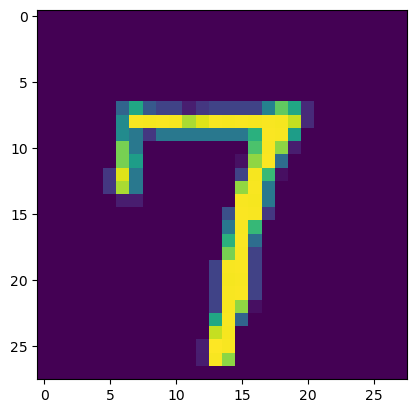

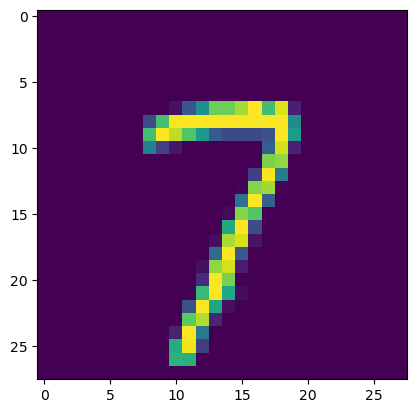

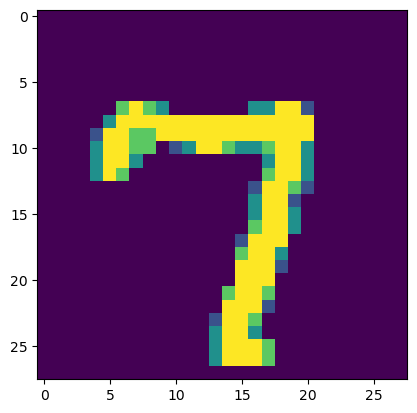

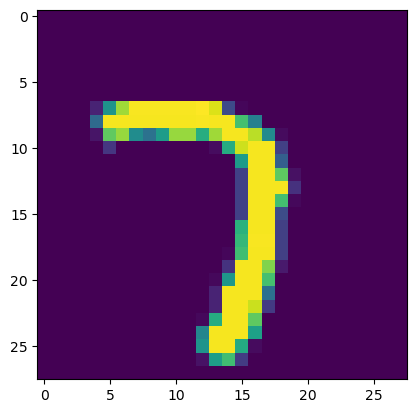

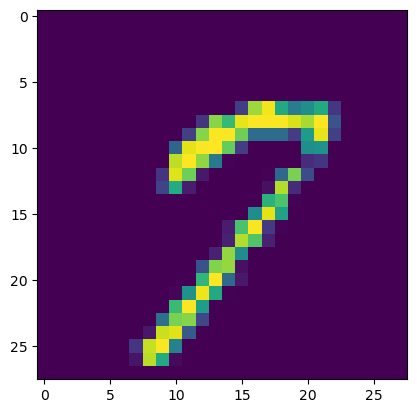

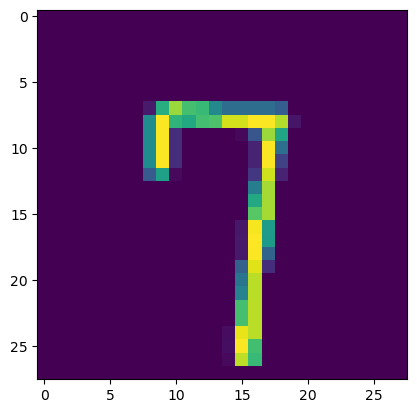

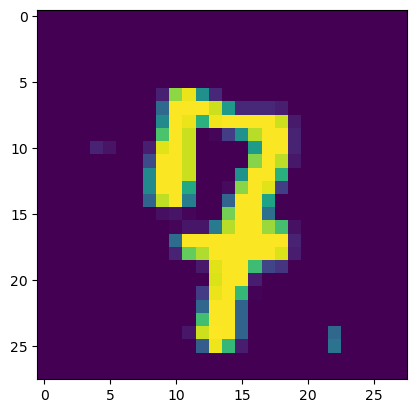

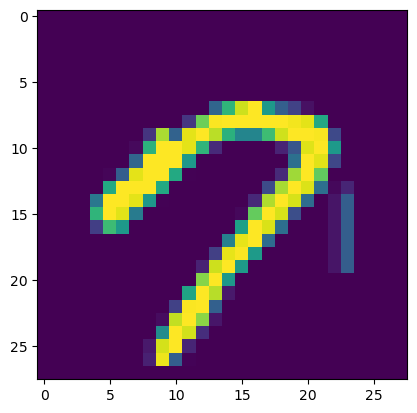

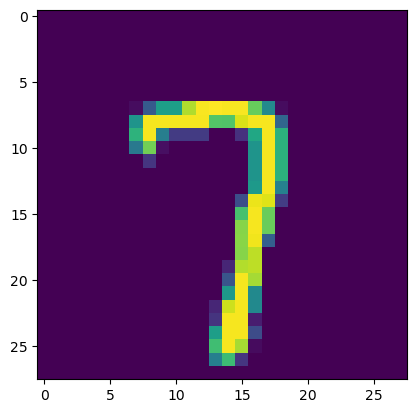

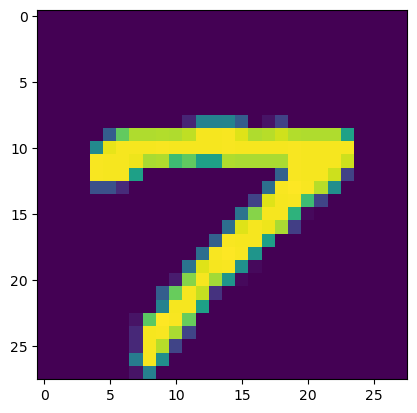

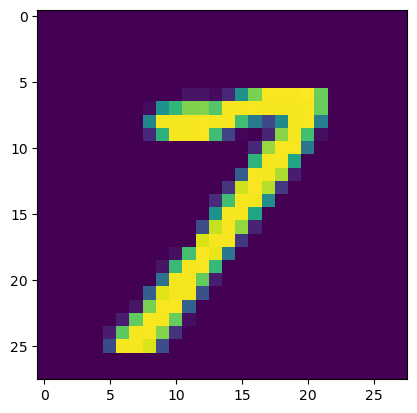

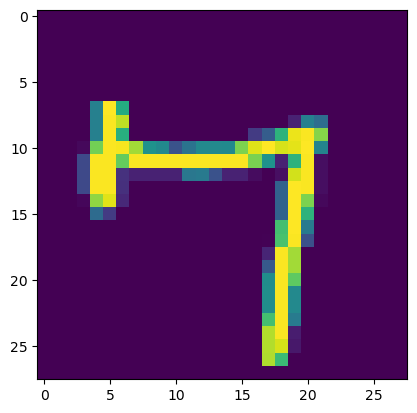

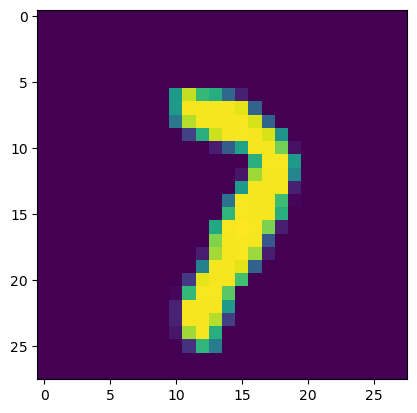

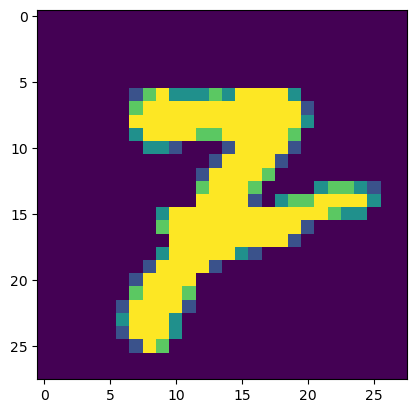

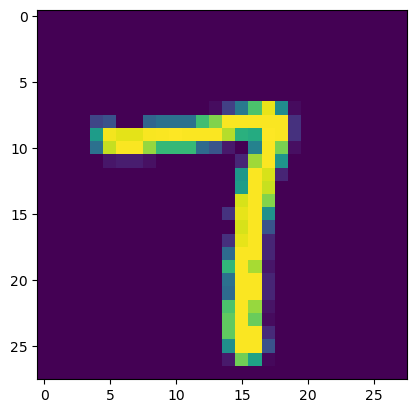

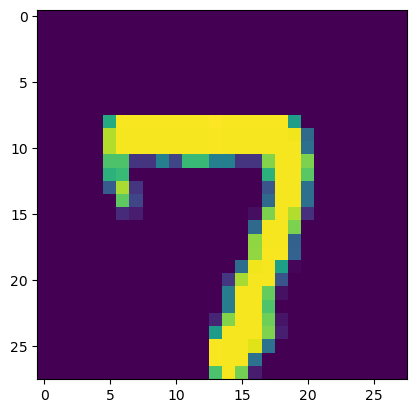

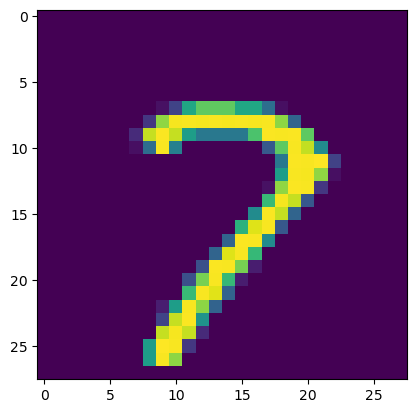

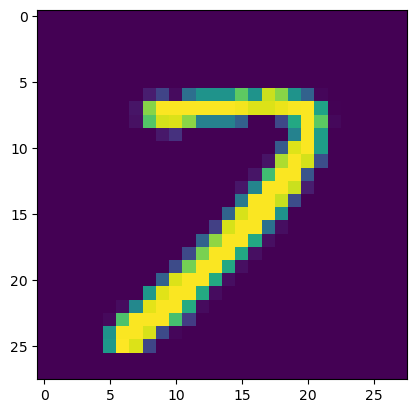

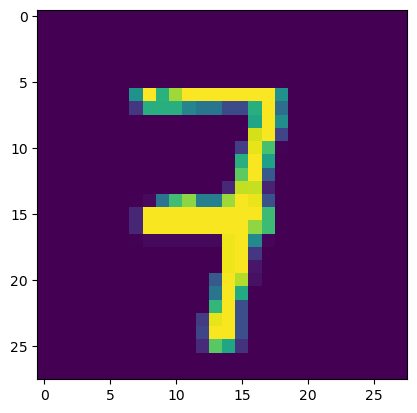

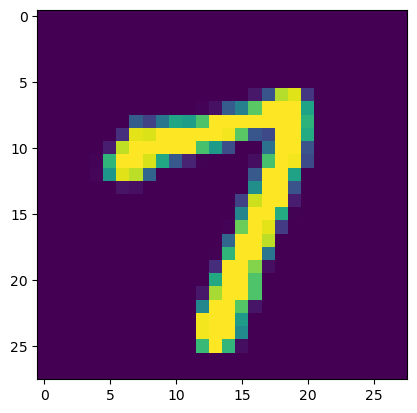

In [10]:
for i in range(20):
    plt.imshow(seven_df.iloc[i,1:].values.reshape(28,28))
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(33600, 784)

In [17]:
e1 = 300000 + 3
e2 = 250000 + 2

e1 - e2

1 + 1

2

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9391666666666667

In [27]:
X_train.shape

(33600, 784)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=200)

In [30]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
X_train_trf.shape

(33600, 200)

In [32]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.9507142857142857

In [33]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)

    print(i,accuracy_score(y_test,y_pred))

1 0.25892857142857145
2 0.32321428571428573
3 0.5104761904761905
4 0.6663095238095238
5 0.7378571428571429
6 0.8227380952380953
7 0.843452380952381
8 0.8725
9 0.8853571428571428
10 0.9058333333333334
11 0.911547619047619
12 0.9183333333333333
13 0.9282142857142858
14 0.9355952380952381
15 0.9376190476190476
16 0.9375
17 0.940952380952381
18 0.9398809523809524
19 0.9436904761904762
20 0.9433333333333334
21 0.9430952380952381
22 0.9436904761904762
23 0.9435714285714286
24 0.9451190476190476
25 0.9475
26 0.9476190476190476
27 0.9483333333333334
28 0.9480952380952381
29 0.9486904761904762
30 0.949047619047619
31 0.9489285714285715
32 0.9513095238095238
33 0.9523809523809523
34 0.9517857142857142
35 0.9508333333333333
36 0.9517857142857142
37 0.9523809523809523
38 0.9533333333333334
39 0.954047619047619
40 0.9528571428571428
41 0.9534523809523809
42 0.9526190476190476



KeyboardInterrupt



In [34]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [35]:
X_train_trf.shape

(33600, 784)

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

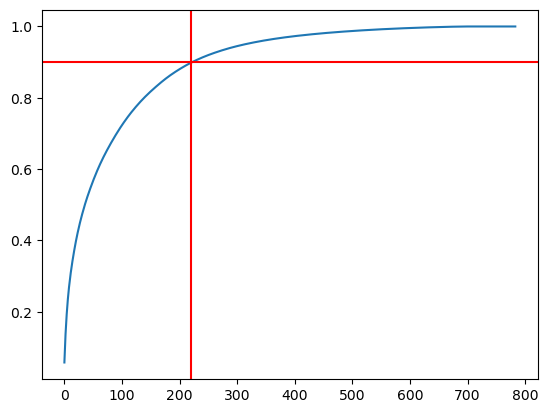

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9,color="red")
plt.axvline(220,color="red")
plt.show()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [43]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
X_train_trf

array([[-2.71862068, -0.48910434],
       [-0.67698796, -6.75464832],
       [-3.03326307,  6.50865483],
       ...,
       [ 2.14878883,  0.78047286],
       [ 1.05957302,  0.94875637],
       [17.70255822,  1.9613806 ]])

In [44]:
import plotly.express as px

In [49]:
px.scatter(x= X_train_trf[:,0], y = X_train_trf[:,1], color = y_train.astype("str"),
          color_discrete_sequence=px.colors.qualitative.G10)

In [50]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [51]:
px.scatter_3d(x= X_train_trf[:,0], y = X_train_trf[:,1], z =  X_train_trf[:,2],
              color = y_train.astype("str"),
          color_discrete_sequence=px.colors.qualitative.G10)